# Codebasics Resume Project Challenge

You have to access two folders, named "domestic_visitors" and "foreign_visitors", which contain individual tourist data from the years 2016 to 2019 in CSV format. To better understand the column descriptions, please refer to the provided file "metadata.txt".

### Task 1

Merge all individual CSV files in "domestic_visitors" and "foreign_visitors" folders using a data integration tool such as Pandas or PowerBI, and name the resulting files "domestic_visitors.csv" and "foreign_visitors.csv", respectively, containing all data from 2016 to 2019.

### Importing libraries

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os

### Loading and merging datasets (Method 1)

In [2]:
# Loading 

d_vis_2016 = pd.read_csv(r'C:\Users\ap422\OneDrive\Documents\CodeBasics_ResumeProject\Challenge_5\C5 Input to participants\domestic_visitors\domestic_visitors_2016.csv')
d_vis_2017 = pd.read_csv(r'C:\Users\ap422\OneDrive\Documents\CodeBasics_ResumeProject\Challenge_5\C5 Input to participants\domestic_visitors\domestic_visitors_2017.csv')
d_vis_2018 = pd.read_csv(r'C:\Users\ap422\OneDrive\Documents\CodeBasics_ResumeProject\Challenge_5\C5 Input to participants\domestic_visitors\domestic_visitors_2018.csv')
d_vis_2019 = pd.read_csv(r'C:\Users\ap422\OneDrive\Documents\CodeBasics_ResumeProject\Challenge_5\C5 Input to participants\domestic_visitors\domestic_visitors_2019.csv')

In [3]:
# Merging 

domestic_visitors = pd.concat([d_vis_2016,d_vis_2017, d_vis_2018, d_vis_2019], ignore_index=True)

# Saving as csv in my current working directory
domestic_visitors.to_csv('domestic_visitors.csv', index=False)

# To know the location where the merged file is saved:
print(os.getcwd())

# # If you want to use merged data, do as below:
domestic_visitors = pd.read_csv(r'C:\Users\ap422\CodeBasics\domestic_visitors.csv')
domestic_visitors.head()

C:\Users\ap422\CodeBasics


,district,date,month,year,visitors
0,Adilabad,01-01-2016,January,2016,792136
1,Adilabad,01-02-2016,February,2016,937820
2,Adilabad,01-03-2016,March,2016,582946
3,Adilabad,01-04-2016,April,2016,341948
4,Adilabad,01-05-2016,May,2016,252887


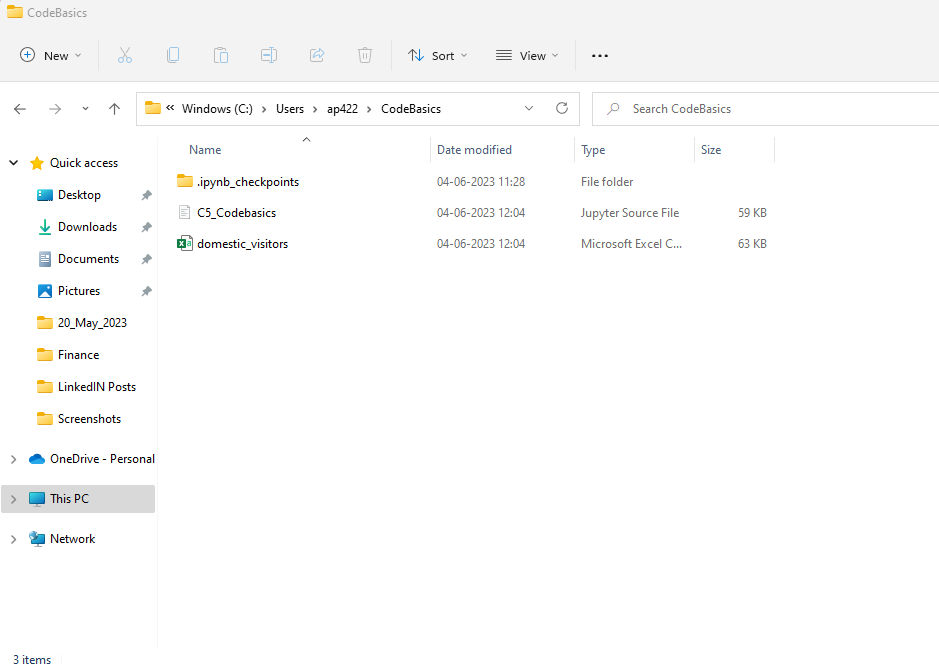

### Loading and merging datasets (Method 2)

In [4]:
def data_merge(directory_path):
    """This function will take directory path input from user and will return merged csv files found on path provided"""
    data = []                                    # Create an empty list to store the data from each CSV file
    for filename in os.listdir(directory_path):  # Iterate over the files in the directory using 'os.listdir()'
        if filename.endswith(".csv"):
            file_path = os.path.join(directory_path, filename)    
            df = pd.read_csv(file_path)          #Use the pd.read_csv() function to read each CSV file and append the data to the list
            data.append(df)
    return data 

merged_data_d = data_merge(r'C:\Users\ap422\OneDrive\Documents\CodeBasics_ResumeProject\Challenge_5\C5 Input to participants\domestic_visitors')

In [5]:
# To know the location where the merged file is saved:
print(os.getcwd())

C:\Users\ap422\CodeBasics


In [7]:
# Concatenate the data from all CSV files into a single DataFrame using pd.concat()
domestic_visitors_1 = pd.concat(merged_data_d, ignore_index=True)
        
# Now, the domestic_visitors_1 DataFrame will contain the data from all the CSV files in the specified directory.

# Saving as csv in my current working directory
domestic_visitors_1.to_csv('domestic_visitors_1.csv', index=False)

# If you want to use merged data, do as below:
domestic_visitors_1 = pd.read_csv(r'C:\Users\ap422\CodeBasics\domestic_visitors_1.csv')
domestic_visitors_1.tail()

,district,date,month,year,visitors
1507,Yadadri Bhongir,01-08-2019,August,2019,389010
1508,Yadadri Bhongir,01-09-2019,September,2019,366862
1509,Yadadri Bhongir,01-10-2019,October,2019,381860
1510,Yadadri Bhongir,01-11-2019,November,2019,365990
1511,Yadadri Bhongir,01-12-2019,December,2019,477635


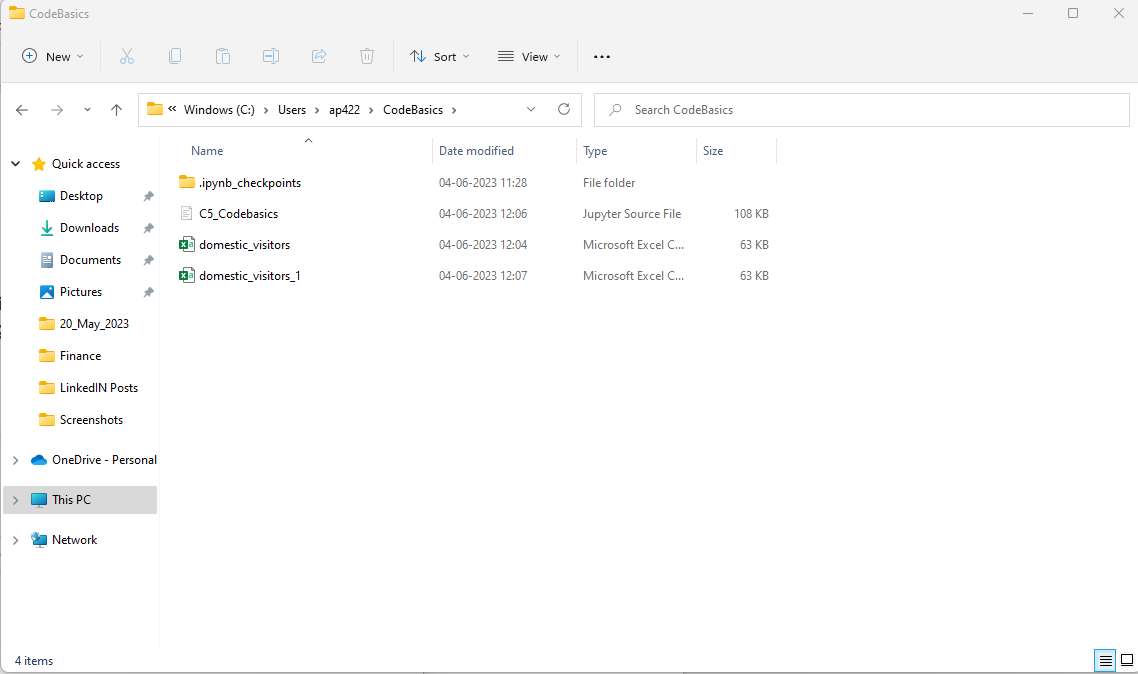

## You can choose any 1 of the above 2 ways I showed to merge the csv files.  To merge foreign visitors csv files, I will use the function I created in my method 2.

In [8]:
merged_data_f = data_merge(r'C:\Users\ap422\OneDrive\Documents\CodeBasics_ResumeProject\Challenge_5\C5 Input to participants\foreign_visitors')

In [11]:
# Concatenate the data from all CSV files into a single DataFrame using pd.concat()
foreign_visitors = pd.concat(merged_data_f, ignore_index=True)
        
# Now, the foreign_visitors DataFrame will contain the data from all the CSV files in the specified directory.

# Saving as csv in my current working directory
foreign_visitors.to_csv('foreign_visitors.csv', index=False)

# If you want to use merged data, do as below:
foreign_visitors = pd.read_csv(r'C:\Users\ap422\CodeBasics\foreign_visitors.csv')
foreign_visitors.head()

C:\Users\ap422\CodeBasics


,district,date,month,year,visitors
0,Adilabad,01-01-2016,January,2016,2
1,Adilabad,01-02-2016,February,2016,0
2,Adilabad,01-03-2016,March,2016,2
3,Adilabad,01-04-2016,April,2016,0
4,Adilabad,01-05-2016,May,2016,0


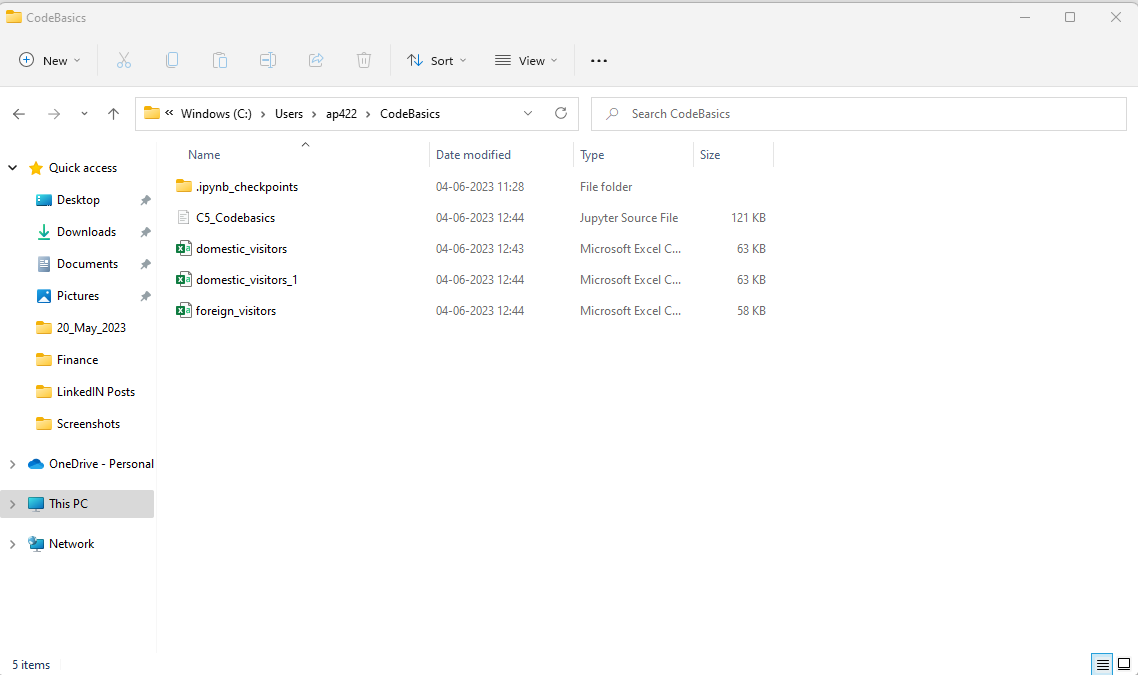

### Task2

Once the merged data is obtained, you can use it to answer the questions listed in the file 'research_questions_and_recommendations.pdf'. You can use any tool of your choice (Python, SQL, PowerBI, Tableau, Excel) to answer these questions. 

### Preliminary research questions: (Answers can be found directly from the given data)

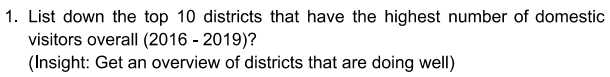

> __Finding__: Visitors column data type is not all numeric

In [26]:
# Convert 'visitors' column to numeric 
domestic_visitors['visitors'] = pd.to_numeric(domestic_visitors['visitors'], errors='coerce')

In [31]:
top_10_districts = domestic_visitors.sort_values('visitors',ascending=False).head(10)['district']
top_10_districts.to_list()

['Warangal (Urban)',
 'Hyderabad',
 'Bhadradri Kothagudem ',
 'Jayashankar Bhoopalpally',
 'Jayashankar Bhoopalpally',
 'Rajanna Sircilla ',
 'Hyderabad',
 'Yadadri Bhongir',
 'Yadadri Bhongir',
 'Hyderabad']

> __Finding__: Some districts are coming twice or thrice in top 10 districts because they had highest no. of visitors in more than 1 month. To understand more, refer to screenshot below.

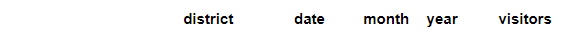
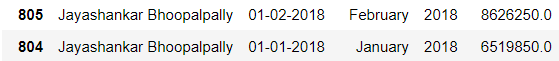
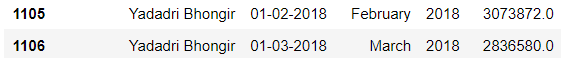




<div class="alert-success">
<b><h1> Additionally, we can find top 10 districts by visitor count for particular year/for each month </h1></b>
</div>

In [37]:
top_10_districts_1 = domestic_visitors.groupby(['year', 'month', 'district'])['visitors'].sum().reset_index()
top_10_districts_1 = top_10_districts_1.groupby(['year', 'month']).apply(lambda x: x.nlargest(10, 'visitors')).reset_index(drop=True)
top_10_districts_grouped = top_10_districts_1.groupby(['year', 'month'])

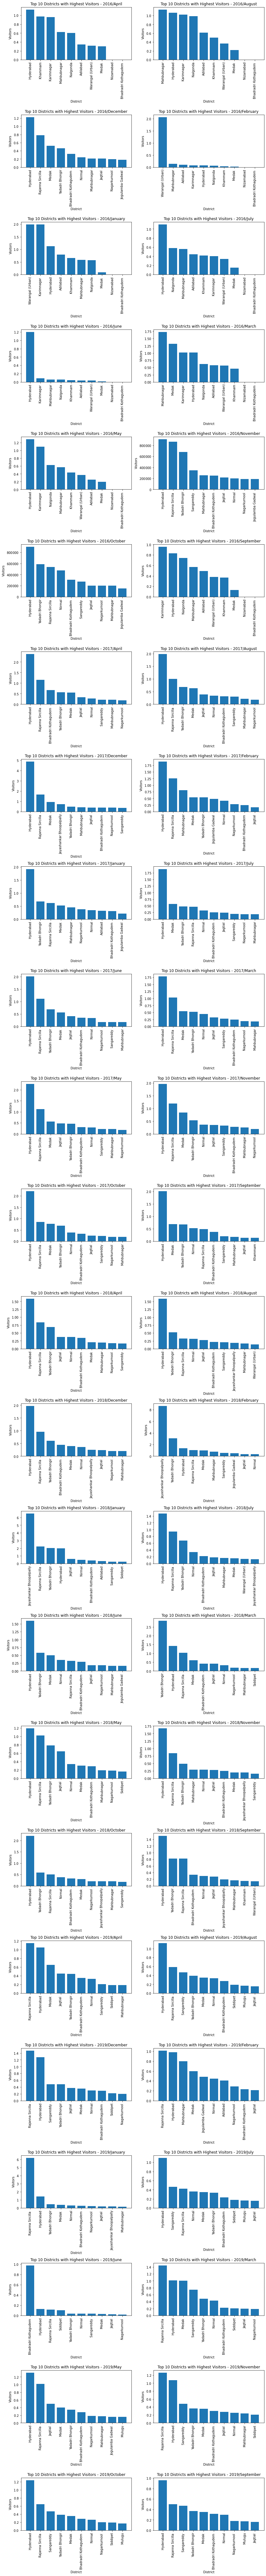

In [51]:
# Calculate the number of plots required based on the number of groups
num_plots = len(top_10_districts_grouped)

# Calculate the number of rows and columns for the subplots grid
num_rows = int(num_plots / 2)  # Number of rows (assuming 2 columns)
num_cols = 2  # Number of columns

# Create the subplots grid
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 5))

# Flatten the axs array to easily iterate over the subplots
axs = axs.flatten()

# Plotting loop to create a separate plot for each group
for i, (group, data) in enumerate(top_10_districts_grouped):
    year, month = group
    
    # Plot on the corresponding subplot
    axs[i].bar(data['district'], data['visitors'])
    axs[i].set_title(f'Top 10 Districts with Highest Visitors - {year}/{month}')
    axs[i].set_xlabel('District')
    axs[i].set_ylabel('Visitors')
    axs[i].tick_params(axis='x', rotation=90)
    
    # Disable scientific notation on the y-axis
    axs[i].yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
    axs[i].yaxis.offsetText.set_visible(False)

# Hide any empty subplots
for j in range(i+1, num_plots):
    fig.delaxes(axs[j])

# Adjust spacing between subplots
fig.tight_layout(rect=[0, 0, 1, 0.96])

# Display the subplots grid
plt.show()

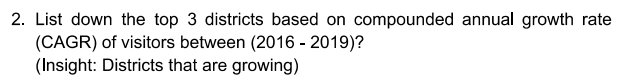

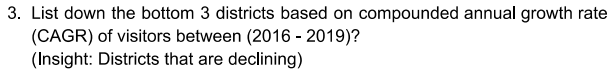

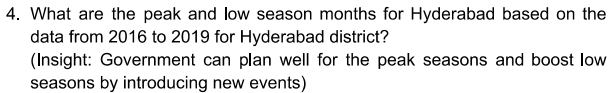

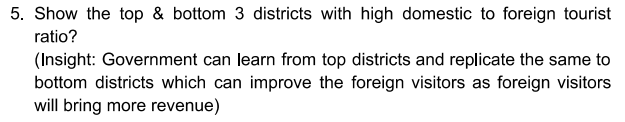

### Secondary research questions: (Need to do research and get additional data)

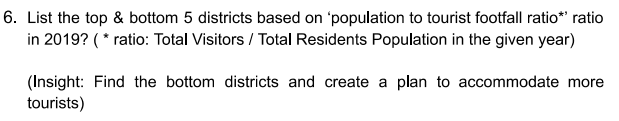

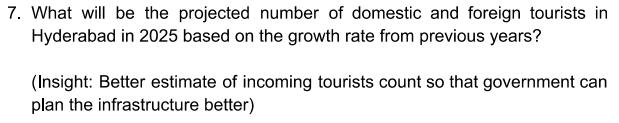

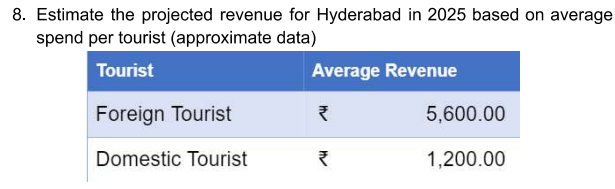
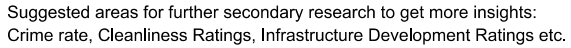

### Recommendations that can be provided to the government

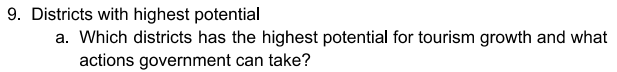

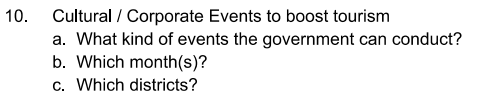

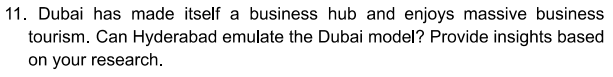

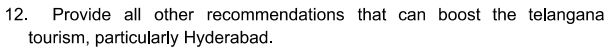